In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

In [5]:
# Import the dataset
df=pd.read_csv("cleaned_data.csv")
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [16]:
df=pd.read_csv("cleaned_data.csv")
df['default.payment.next.month'].mean()

0.2212

In [18]:
df.groupby("default.payment.next.month")['ID'].count()

default.payment.next.month
0    23364
1     6636
Name: ID, dtype: int64

In [20]:
X= df['LIMIT_BAL'].values.reshape(-1,1)
y= df['default.payment.next.month'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2, random_state=24)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 1)
(6000, 1)
(24000,)
(6000,)


In [22]:
from sklearn.linear_model import LogisticRegression
lr1= LogisticRegression()
lr1.solver='lbfgs'
lr1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = lr1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn import metrics
y_pred_proba = lr1.predict_proba(X_test)
ROC_AREA_BY_LIMIT_BAL = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
ROC_AREA_BY_LIMIT_BAL

0.5997190563174555

In [26]:
X = df['EDUCATION'].values.reshape(-1,1)
y= df['default.payment.next.month'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2, random_state=24)
lr2 = LogisticRegression()
lr2.solver='lbfgs'
lr2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred2 = lr2.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn import metrics
y_pred_proba2 = lr2.predict_proba(X_test2)
ROC_AREA_BY_EDUCATION = metrics.roc_auc_score(y_test2,y_pred_proba2[:,1])
ROC_AREA_BY_EDUCATION

0.5218330904709763

In [29]:
print("ROC_AREA OF LIMIT BALANCE IS GREATER THAN EDUCATION")

ROC_AREA OF LIMIT BALANCE IS GREATER THAN EDUCATION


Text(0.5, 1.0, 'ROC curve')

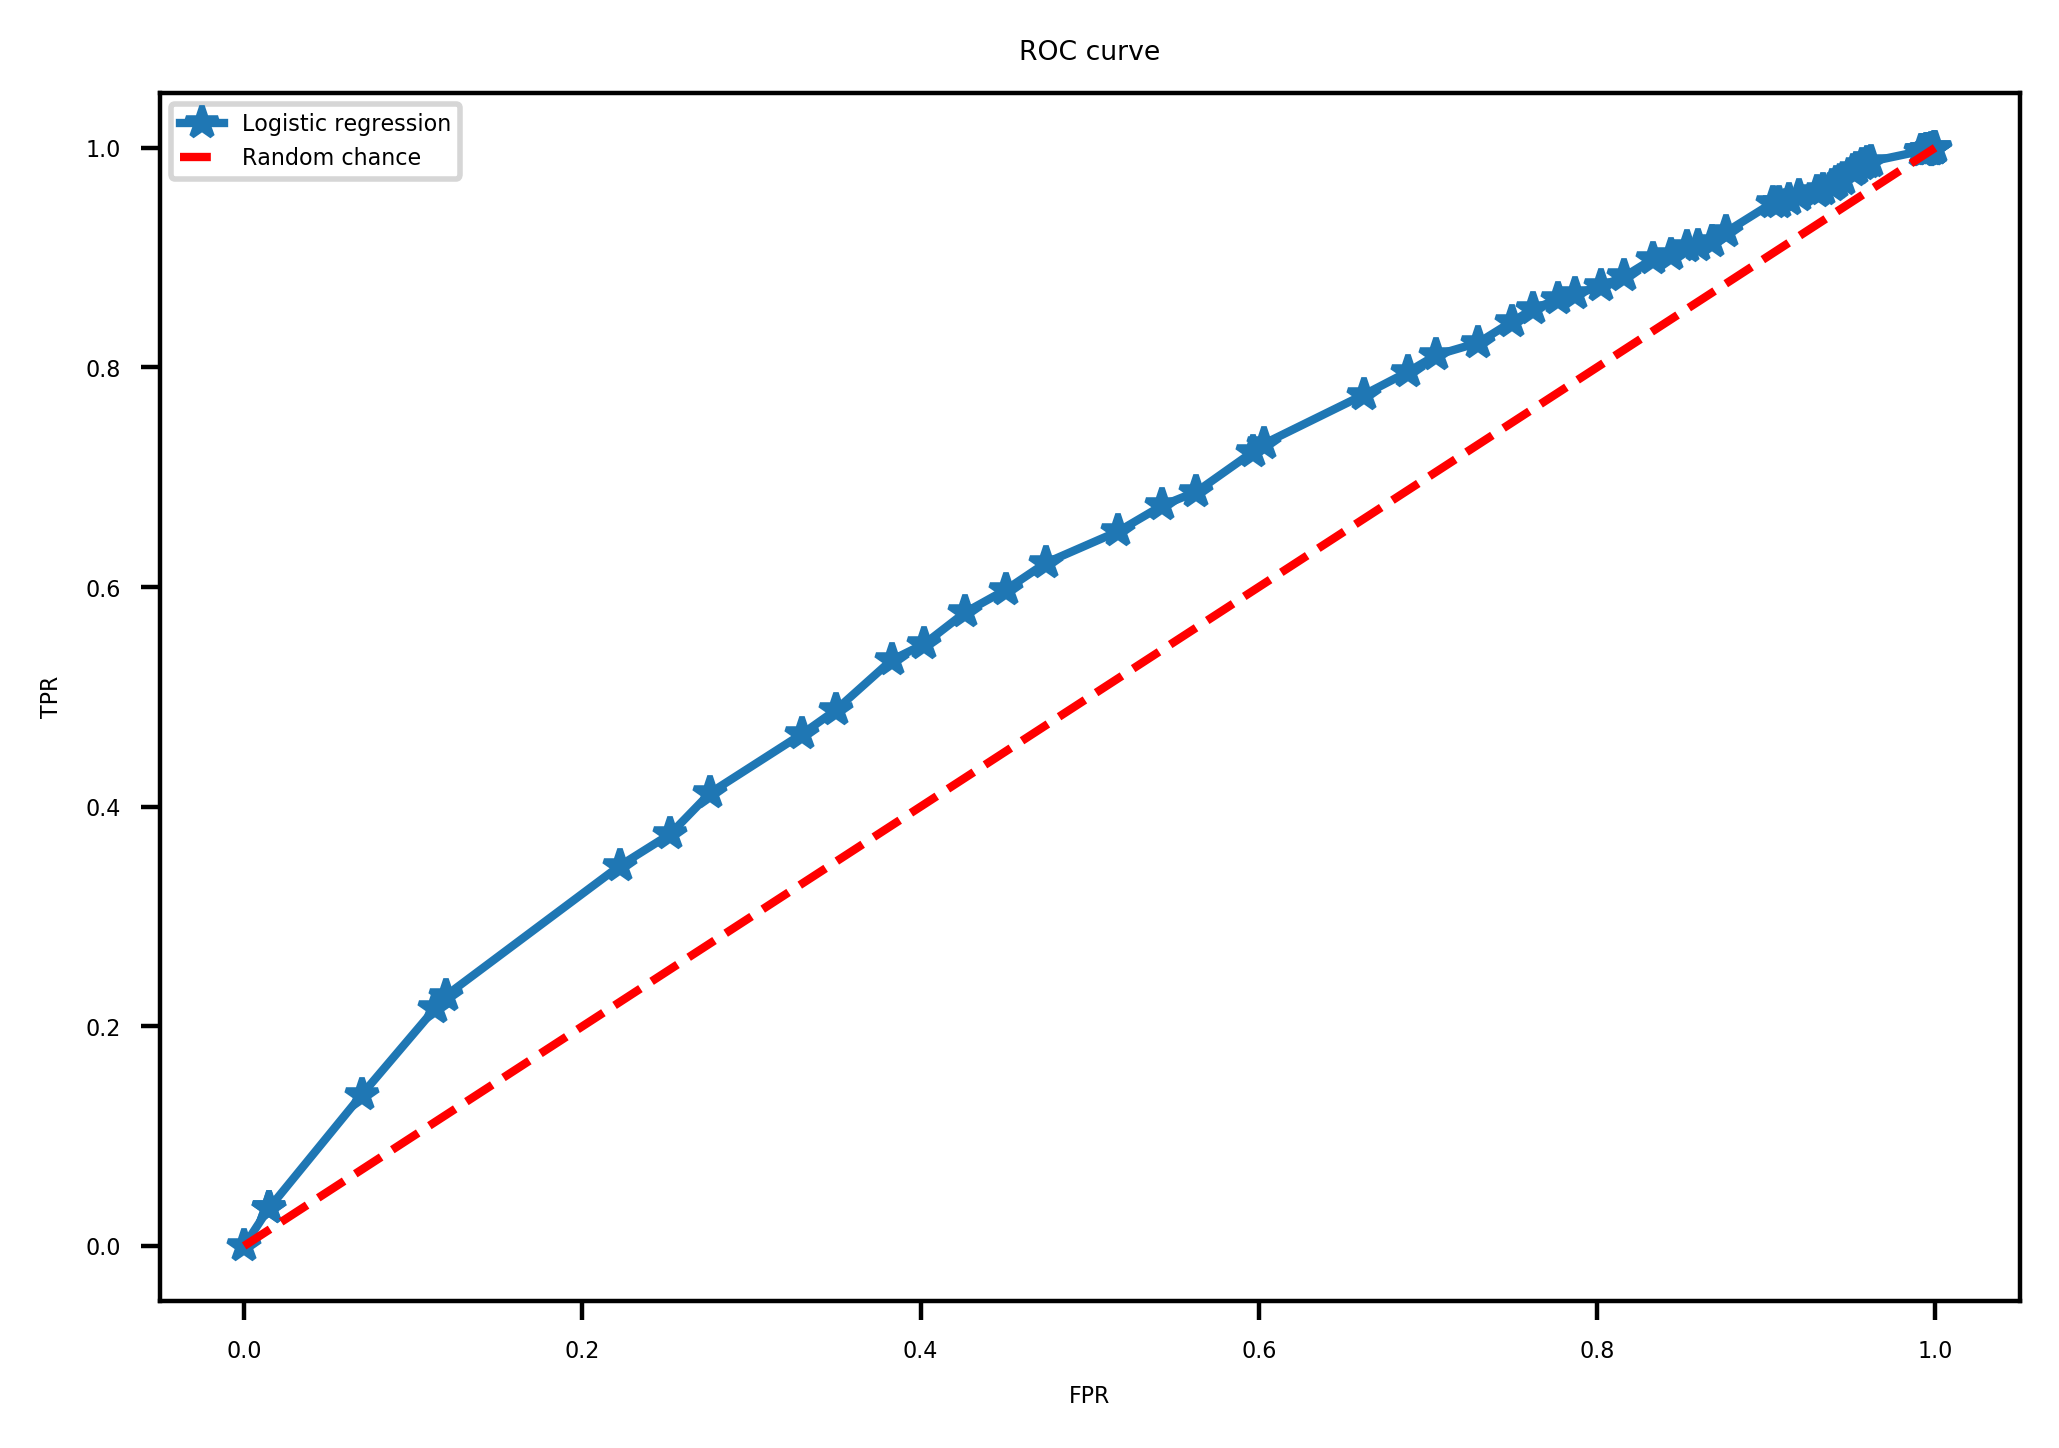

In [30]:
fpr , tpr , threshold = metrics.roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


In [31]:
import sys
p = sum(y_test)
TP = sum((y_test==1)&(y_pred==1))
FN = sum((y_test==1)&(y_pred==0))
N = sum(y_test==0)
TN = sum((y_test==0)&(y_pred==0))
FP = sum((y_test==0)&(y_pred==1))
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision is {} and recall is {}".format(precision,recall))

Precision is nan and recall is 0.0


C:\Users\Mini\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [32]:
import sklearn.metrics
metrics.average_precision_score(y_test2, lr2.predict_proba(X_test2)[:,1])

0.23430867556988472

In [33]:
train_prob = lr1.predict_proba(X_train)
metrics.roc_auc_score(y_train, train_prob[:,1])

0.6223660910247251